In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading Data
df=pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.shape

(730, 16)

In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [7]:
# changing categorical Variable from Int
df.season=df.season.replace(1,'Spring')
df.season=df.season.replace(2,'Summer')
df.season=df.season.replace(3,'Fall')
df.season=df.season.replace(4,'Winter')

In [8]:
df.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

In [9]:
df.mnth.value_counts()

12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64

In [10]:
# changing categorical Variable from Int
df.mnth=df.mnth.replace(1,'Jan')
df.mnth=df.mnth.replace(2,'Feb')
df.mnth=df.mnth.replace(3,'Mar')
df.mnth=df.mnth.replace(4,'Apr')
df.mnth=df.mnth.replace(5,'May')
df.mnth=df.mnth.replace(6,'Jun')
df.mnth=df.mnth.replace(7,'Jul')
df.mnth=df.mnth.replace(8,'Aug')
df.mnth=df.mnth.replace(9,'Sep')
df.mnth=df.mnth.replace(10,'Oct')
df.mnth=df.mnth.replace(11,'Nov')
df.mnth=df.mnth.replace(12,'Dec')


In [11]:
df.mnth.value_counts()

Dec    62
Oct    62
Mar    62
Jul    62
Jan    62
May    62
Aug    62
Apr    60
Sep    60
Jun    60
Nov    60
Feb    56
Name: mnth, dtype: int64

In [12]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
df.weekday.value_counts()

2    105
1    105
6    104
5    104
4    104
3    104
0    104
Name: weekday, dtype: int64

In [14]:
df[df['holiday']==1]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
16,17,17-01-2018,Spring,0,Jan,1,3,0,2,7.209153,8.83855,53.7500,12.999139,117,883,1000
51,52,21-02-2018,Spring,0,Feb,1,3,0,2,12.436653,14.20375,60.5000,20.625682,195,912,1107
104,105,15-04-2018,Summer,0,Apr,1,0,0,1,18.313347,22.09565,67.1250,15.167125,642,2484,3126
149,150,30-05-2018,Summer,0,May,1,3,0,1,30.066653,33.55460,68.5000,8.792075,1549,2549,4098
184,185,04-07-2018,Fall,0,Jul,1,3,0,2,29.793347,33.27085,63.7917,5.459106,3065,2978,6043
247,248,05-09-2018,Fall,0,Sep,1,3,0,2,27.606653,31.28230,79.0417,14.250632,1236,2115,3351
282,283,10-10-2018,Winter,0,Oct,1,3,0,1,23.404153,27.14625,73.3750,2.834381,1514,3603,5117
314,315,11-11-2018,Winter,0,Nov,1,0,0,1,13.290847,15.34085,44.6250,21.083225,440,2928,3368
327,328,24-11-2018,Winter,0,Nov,1,6,0,1,15.306653,18.62355,54.9167,11.209368,560,935,1495
359,360,26-12-2018,Spring,0,Dec,1,3,0,1,13.191299,15.77675,50.6957,16.044155,430,887,1317


In [15]:
# changing categorical Variable from Int
df.weekday=df.weekday.replace(0,'Sun')
df.weekday=df.weekday.replace(1,'Mon')
df.weekday=df.weekday.replace(2,'Tue')
df.weekday=df.weekday.replace(3,'Wed')
df.weekday=df.weekday.replace(4,'Thurs')
df.weekday=df.weekday.replace(5,'Fri')
df.weekday=df.weekday.replace(6,'Sat')

In [16]:
df.weekday.value_counts()

Tue      105
Mon      105
Sun      104
Fri      104
Thurs    104
Wed      104
Sat      104
Name: weekday, dtype: int64

In [17]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,Mon,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Tue,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Wed,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Thurs,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Fri,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [18]:
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [19]:
# changing categorical Variable from Int
df.weathersit=df.weathersit.replace(1,'clear')
df.weathersit=df.weathersit.replace(2,'Mist')
df.weathersit=df.weathersit.replace(3,'Light Snow')
df.weathersit=df.weathersit.replace(4,'Heavy Rain')

In [20]:
df.weathersit.value_counts()

clear         463
Mist          246
Light Snow     21
Name: weathersit, dtype: int64

In [21]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,Jan,0,Mon,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,Jan,0,Tue,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,Jan,0,Wed,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,Jan,0,Thurs,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,Jan,0,Fri,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [22]:
df.dteday=pd.to_datetime(df.dteday)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  atemp       730 non-null    float64       
 11  hum         730 non-null    float64       
 12  windspeed   730 non-null    float64       
 13  casual      730 non-null    int64         
 14  registered  730 non-null    int64         
 15  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), floa

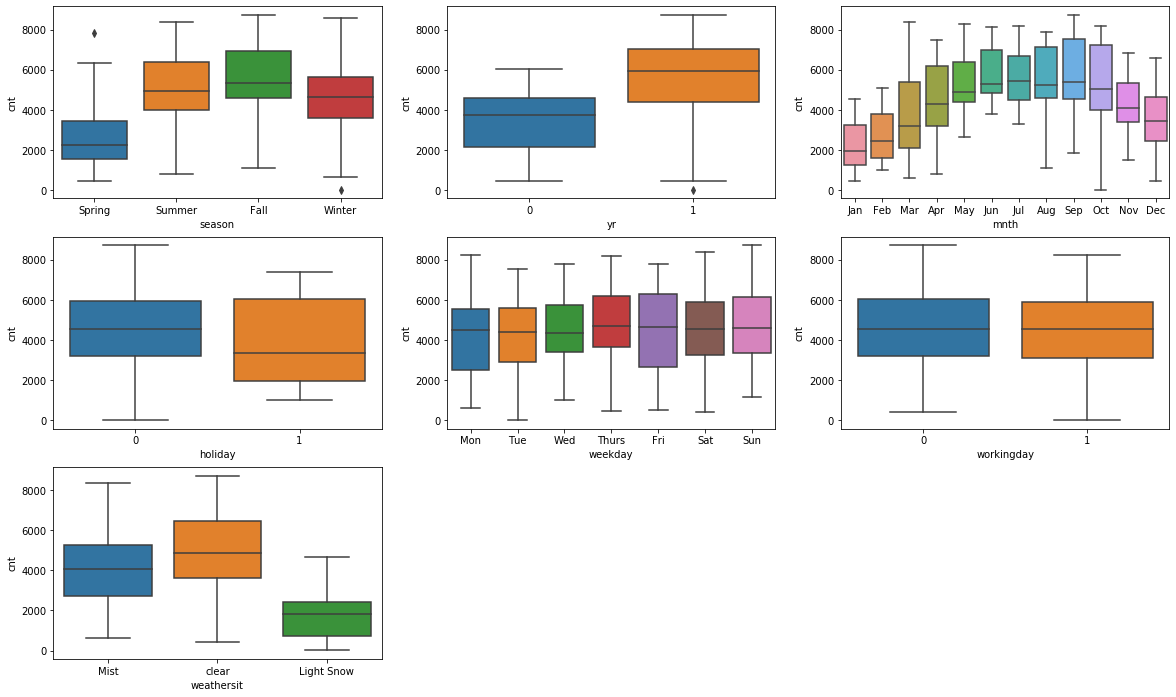

In [24]:
# Plot to determine Outliers
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = df['season'], y = df['cnt'], data = df)
plt.subplot(3,3,2)
sns.boxplot(x = df['yr'], y = df['cnt'], data = df)
plt.subplot(3,3,3)
sns.boxplot(x = df['mnth'], y = df['cnt'], data = df)
plt.subplot(3,3,4)
sns.boxplot(x = df['holiday'], y = df['cnt'], data = df)
plt.subplot(3,3,5)
sns.boxplot(x = df['weekday'], y = df['cnt'], data = df)
plt.subplot(3,3,6)
sns.boxplot(x = df['workingday'], y = df['cnt'], data = df)
plt.subplot(3,3,7)
sns.boxplot(x = df['weathersit'], y = df['cnt'], data = df)
plt.show()
# Median is higher for Fall
# Median Value is lower for Spring
# Both working day and holiday has equal median
# Density is more for holiday

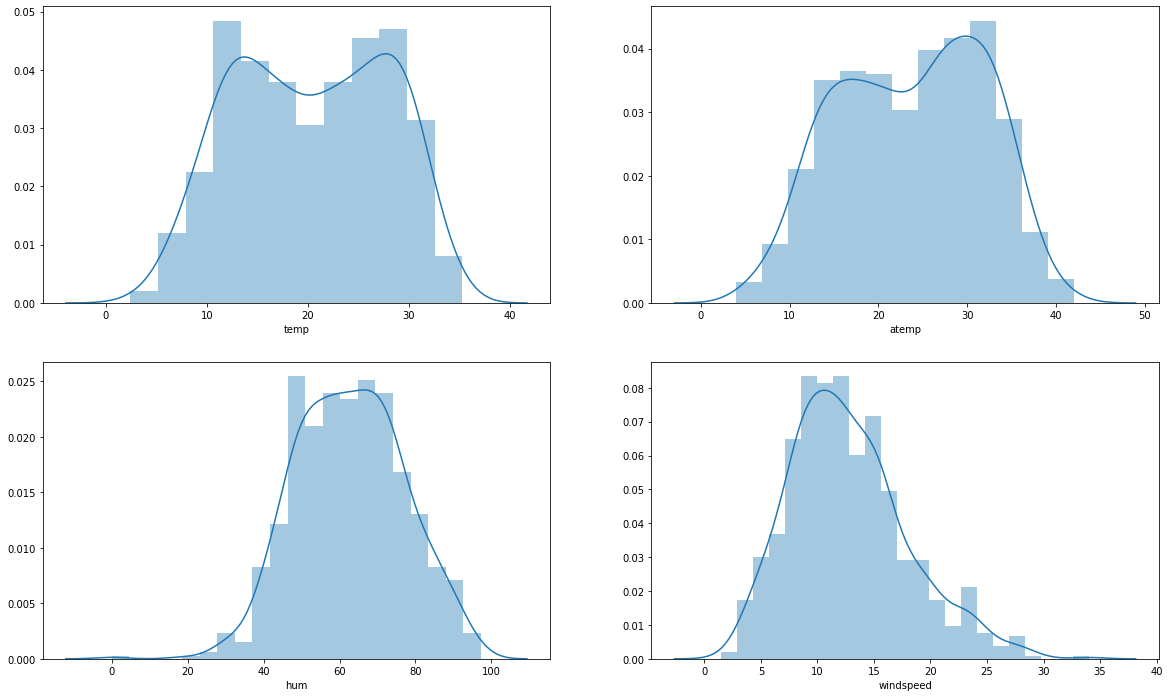

In [25]:
# Plot to determine the distribution of data
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.distplot(df['temp'])
plt.subplot(2,2,2)
sns.distplot(df['atemp'])
plt.subplot(2,2,3)
sns.distplot(df['hum'])
plt.subplot(2,2,4)
sns.distplot(df['windspeed'])
plt.show()

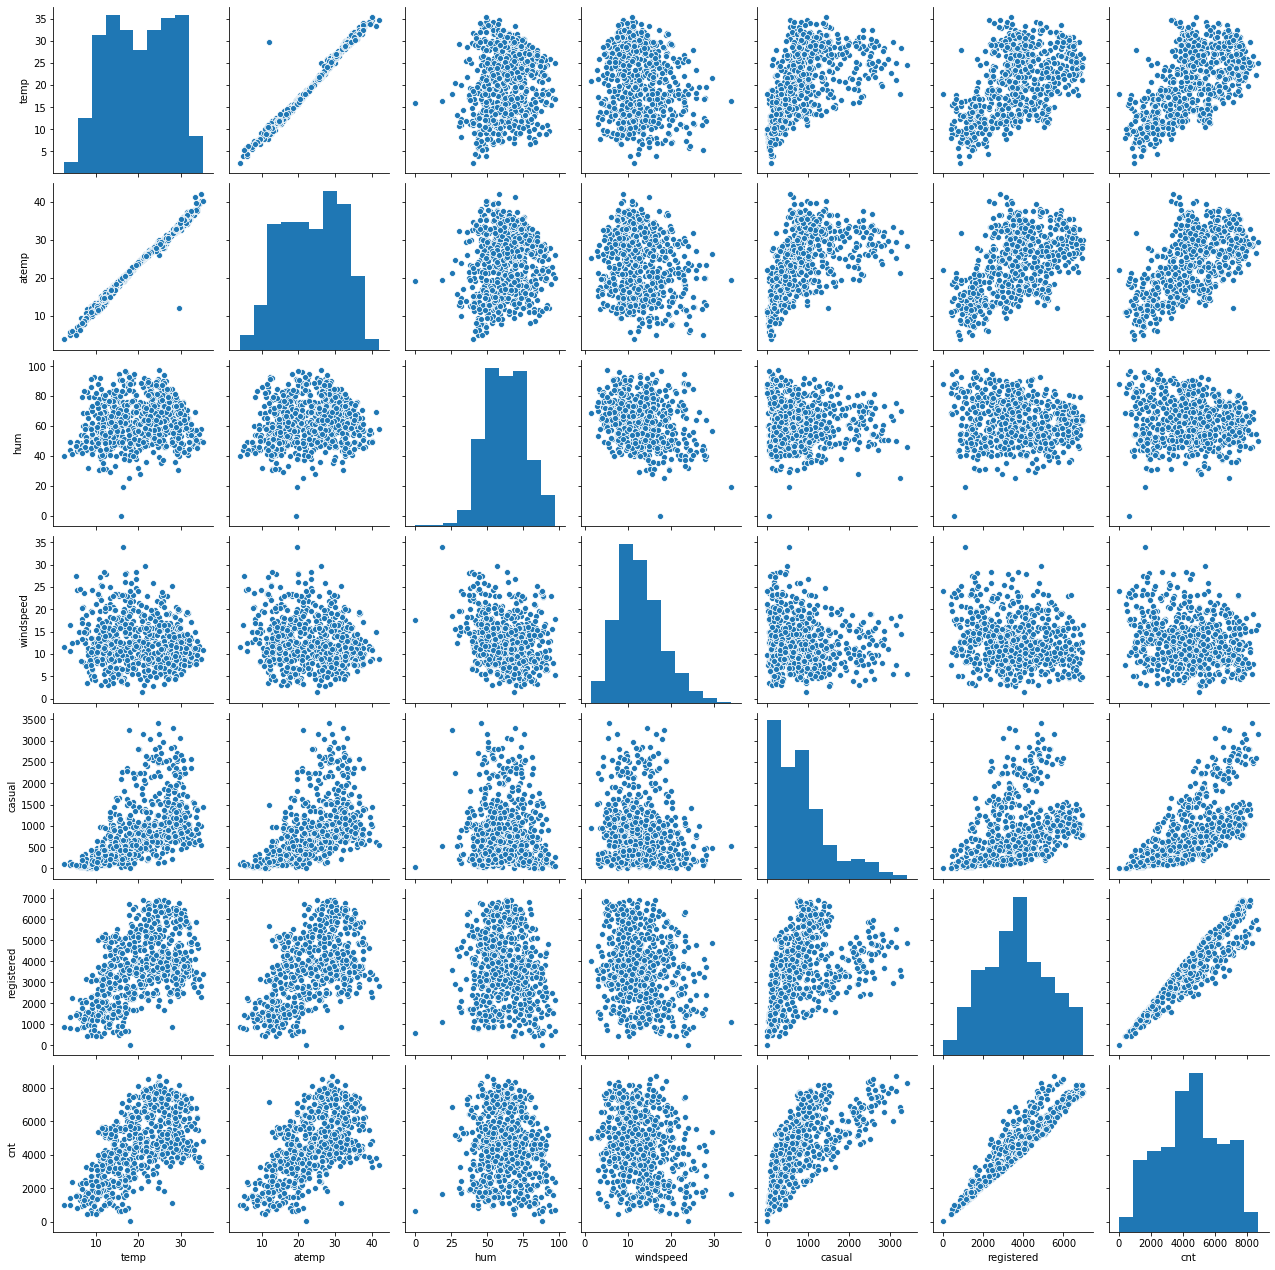

In [26]:
# Plot to determine the scatter of Numerical Variable
df1=df[['temp','atemp','hum','windspeed','casual','registered','cnt']]
sns.pairplot(df1)
plt.show()

In [27]:
# To determine highly correlated variable
df.corr()

,instant,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866026,0.016275,-0.015171,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
yr,0.866026,1.000000,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
holiday,0.016275,0.008195,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
workingday,-0.015171,-0.011852,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.090369,0.005466,-0.027640
temp,0.150738,0.048789,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,0.047215,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.016080,-0.112547,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.112667,-0.011624,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.275604,0.250502,0.054055,-0.090369,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.660544,0.596911,-0.109142,0.005466,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411


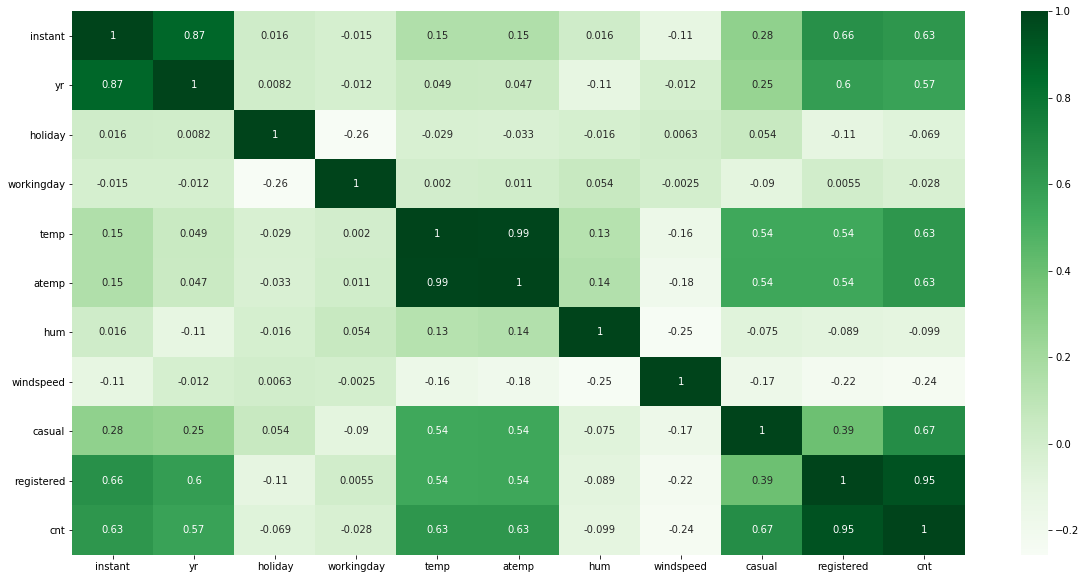

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='Greens',annot=True)
plt.show()

In [29]:
#dropping Highly Correlated Variables
df.drop(['registered'],axis=1,inplace=True)
df.drop(['casual'],axis=1,inplace=True)
df.drop(['atemp'],axis=1,inplace=True)
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,2018-01-01,Spring,0,Jan,0,Mon,1,Mist,14.110847,80.5833,10.749882,985
1,2,2018-02-01,Spring,0,Jan,0,Tue,1,Mist,14.902598,69.6087,16.652113,801
2,3,2018-03-01,Spring,0,Jan,0,Wed,1,clear,8.050924,43.7273,16.636703,1349
3,4,2018-04-01,Spring,0,Jan,0,Thurs,1,clear,8.200000,59.0435,10.739832,1562
4,5,2018-05-01,Spring,0,Jan,0,Fri,1,clear,9.305237,43.6957,12.522300,1600


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     730 non-null    int64         
 1   dteday      730 non-null    datetime64[ns]
 2   season      730 non-null    object        
 3   yr          730 non-null    int64         
 4   mnth        730 non-null    object        
 5   holiday     730 non-null    int64         
 6   weekday     730 non-null    object        
 7   workingday  730 non-null    int64         
 8   weathersit  730 non-null    object        
 9   temp        730 non-null    float64       
 10  hum         730 non-null    float64       
 11  windspeed   730 non-null    float64       
 12  cnt         730 non-null    int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(4)
memory usage: 74.3+ KB


In [31]:
#dropping Date time
df.drop(['dteday'],axis=1,inplace=True)
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,Spring,0,Jan,0,Mon,1,Mist,14.110847,80.5833,10.749882,985
1,2,Spring,0,Jan,0,Tue,1,Mist,14.902598,69.6087,16.652113,801
2,3,Spring,0,Jan,0,Wed,1,clear,8.050924,43.7273,16.636703,1349
3,4,Spring,0,Jan,0,Thurs,1,clear,8.200000,59.0435,10.739832,1562
4,5,Spring,0,Jan,0,Fri,1,clear,9.305237,43.6957,12.522300,1600


In [32]:
# Encoding of Categorical Variables
# Let's drop the first column from status1 df using 'drop_first = True'

status1 = pd.get_dummies(df['season'], drop_first = True)
df = pd.concat([df, status1], axis = 1)
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,Summer,Winter
0,1,Spring,0,Jan,0,Mon,1,Mist,14.110847,80.5833,10.749882,985,1,0,0
1,2,Spring,0,Jan,0,Tue,1,Mist,14.902598,69.6087,16.652113,801,1,0,0
2,3,Spring,0,Jan,0,Wed,1,clear,8.050924,43.7273,16.636703,1349,1,0,0
3,4,Spring,0,Jan,0,Thurs,1,clear,8.200000,59.0435,10.739832,1562,1,0,0
4,5,Spring,0,Jan,0,Fri,1,clear,9.305237,43.6957,12.522300,1600,1,0,0


In [33]:
df.shape

(730, 15)

In [34]:
# Let's drop the first column from status2 df using 'drop_first = True'

status2 = pd.get_dummies(df['mnth'], drop_first = True)
df = pd.concat([df, status2], axis = 1)
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1,Spring,0,Jan,0,Mon,1,Mist,14.110847,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,2,Spring,0,Jan,0,Tue,1,Mist,14.902598,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,3,Spring,0,Jan,0,Wed,1,clear,8.050924,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,4,Spring,0,Jan,0,Thurs,1,clear,8.200000,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,5,Spring,0,Jan,0,Fri,1,clear,9.305237,43.6957,...,0,0,1,0,0,0,0,0,0,0


In [35]:
df.shape

(730, 26)

In [36]:
# Let's drop the first column from status3 df using 'drop_first = True'

status3 = pd.get_dummies(df['weekday'], drop_first = True)
df = pd.concat([df, status3], axis = 1)
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thurs,Tue,Wed
0,1,Spring,0,Jan,0,Mon,1,Mist,14.110847,80.5833,...,0,0,0,0,1,0,0,0,0,0
1,2,Spring,0,Jan,0,Tue,1,Mist,14.902598,69.6087,...,0,0,0,0,0,0,0,0,1,0
2,3,Spring,0,Jan,0,Wed,1,clear,8.050924,43.7273,...,0,0,0,0,0,0,0,0,0,1
3,4,Spring,0,Jan,0,Thurs,1,clear,8.200000,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,5,Spring,0,Jan,0,Fri,1,clear,9.305237,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Let's drop the first column from status4 df using 'drop_first = True'

status4 = pd.get_dummies(df['weathersit'], drop_first = True)
df = pd.concat([df, status4], axis = 1)
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tue,Wed,Mist,clear
0,1,Spring,0,Jan,0,Mon,1,Mist,14.110847,80.5833,...,0,0,1,0,0,0,0,0,1,0
1,2,Spring,0,Jan,0,Tue,1,Mist,14.902598,69.6087,...,0,0,0,0,0,0,1,0,1,0
2,3,Spring,0,Jan,0,Wed,1,clear,8.050924,43.7273,...,0,0,0,0,0,0,0,1,0,1
3,4,Spring,0,Jan,0,Thurs,1,clear,8.200000,59.0435,...,0,0,0,0,0,1,0,0,0,1
4,5,Spring,0,Jan,0,Fri,1,clear,9.305237,43.6957,...,0,0,0,0,0,0,0,0,0,1


In [38]:
df.drop(['season'],axis=1,inplace=True)
df.head()


,instant,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tue,Wed,Mist,clear
0,1,0,Jan,0,Mon,1,Mist,14.110847,80.5833,10.749882,...,0,0,1,0,0,0,0,0,1,0
1,2,0,Jan,0,Tue,1,Mist,14.902598,69.6087,16.652113,...,0,0,0,0,0,0,1,0,1,0
2,3,0,Jan,0,Wed,1,clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,0,1,0,1
3,4,0,Jan,0,Thurs,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,1,0,0,0,1
4,5,0,Jan,0,Fri,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,0,1


In [39]:
df.drop(['weekday'],axis=1,inplace=True)
df.head()

,instant,yr,mnth,holiday,workingday,weathersit,temp,hum,windspeed,cnt,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tue,Wed,Mist,clear
0,1,0,Jan,0,1,Mist,14.110847,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,1,0
1,2,0,Jan,0,1,Mist,14.902598,69.6087,16.652113,801,...,0,0,0,0,0,0,1,0,1,0
2,3,0,Jan,0,1,clear,8.050924,43.7273,16.636703,1349,...,0,0,0,0,0,0,0,1,0,1
3,4,0,Jan,0,1,clear,8.200000,59.0435,10.739832,1562,...,0,0,0,0,0,1,0,0,0,1
4,5,0,Jan,0,1,clear,9.305237,43.6957,12.522300,1600,...,0,0,0,0,0,0,0,0,0,1


In [40]:
df.drop(['mnth'],axis=1,inplace=True)
df.head()

,instant,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,Spring,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tue,Wed,Mist,clear
0,1,0,0,1,Mist,14.110847,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,1,0
1,2,0,0,1,Mist,14.902598,69.6087,16.652113,801,1,...,0,0,0,0,0,0,1,0,1,0
2,3,0,0,1,clear,8.050924,43.7273,16.636703,1349,1,...,0,0,0,0,0,0,0,1,0,1
3,4,0,0,1,clear,8.200000,59.0435,10.739832,1562,1,...,0,0,0,0,0,1,0,0,0,1
4,5,0,0,1,clear,9.305237,43.6957,12.522300,1600,1,...,0,0,0,0,0,0,0,0,0,1


In [41]:
df.drop(['weathersit'],axis=1,inplace=True)
df.head()

,instant,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tue,Wed,Mist,clear
0,1,0,0,1,14.110847,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,1,0
1,2,0,0,1,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,1,0
2,3,0,0,1,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,0,1
3,4,0,0,1,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,0,1
4,5,0,0,1,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [42]:
df.describe()

,instant,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tue,Wed,Mist,clear
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,0.500000,0.028767,0.690411,20.319259,62.765175,12.763620,4508.006849,0.246575,0.252055,...,0.084932,0.082192,0.143836,0.142466,0.142466,0.142466,0.143836,0.142466,0.336986,0.634247
std,210.877136,0.500343,0.167266,0.462641,7.506729,14.237589,5.195841,1936.011647,0.431313,0.434490,...,0.278971,0.274845,0.351164,0.349767,0.349767,0.349767,0.351164,0.349767,0.473004,0.481971
min,1.000000,0.000000,0.000000,0.000000,2.424346,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.250000,0.000000,0.000000,0.000000,13.811885,52.000000,9.041650,3169.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,365.500000,0.500000,0.000000,1.000000,20.465826,62.625000,12.125325,4548.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,547.750000,1.000000,0.000000,1.000000,26.880615,72.989575,15.625589,5966.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,730.000000,1.000000,1.000000,1.000000,35.328347,97.250000,34.000021,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   yr          730 non-null    int64  
 2   holiday     730 non-null    int64  
 3   workingday  730 non-null    int64  
 4   temp        730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   Spring      730 non-null    uint8  
 9   Summer      730 non-null    uint8  
 10  Winter      730 non-null    uint8  
 11  Aug         730 non-null    uint8  
 12  Dec         730 non-null    uint8  
 13  Feb         730 non-null    uint8  
 14  Jan         730 non-null    uint8  
 15  Jul         730 non-null    uint8  
 16  Jun         730 non-null    uint8  
 17  Mar         730 non-null    uint8  
 18  May         730 non-null    uint8  
 19  Nov         730 non-null    u

In [44]:
df.drop(['instant'],axis=1,inplace=True)
df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tue,Wed,Mist,clear
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,1
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
# Train , Test Split
df_train,df_test=train_test_split(df,train_size=0.7,test_size=0.3,random_state=100)


In [46]:
# Scaling to fix the value between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [47]:
num_vars=['temp', 'hum', 'windspeed','cnt']
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tue,Wed,Mist,clear
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,0,1
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,1
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,1,0
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,1
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [48]:
# Dividing dataset into X and Y
y_train = df_train.pop('cnt')
X_train = df_train


In [49]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [50]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)


In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 3),
 ('Winter', False, 2),
 ('Aug', False, 14),
 ('Dec', False, 6),
 ('Feb', False, 7),
 ('Jan', False, 4),
 ('Jul', True, 1),
 ('Jun', False, 18),
 ('Mar', False, 19),
 ('May', False, 11),
 ('Nov', False, 5),
 ('Oct', False, 16),
 ('Sep', True, 1),
 ('Mon', False, 13),
 ('Sat', False, 9),
 ('Sun', False, 10),
 ('Thurs', False, 17),
 ('Tue', False, 12),
 ('Wed', False, 15),
 ('Mist', True, 1),
 ('clear', True, 1)]

In [53]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Spring', 'Jul', 'Sep',
       'Mist', 'clear'],
      dtype='object')

In [54]:
X_train.columns[~rfe.support_]


Index(['workingday', 'Summer', 'Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tue', 'Wed'],
      dtype='object')

In [55]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [56]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [57]:
# Running a linear regression model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [58]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     246.6
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          6.44e-186
Time:                        13:26:13   Log-Likelihood:                 492.94
No. Observations:                 510   AIC:                            -963.9
Df Residuals:                     499   BIC:                            -917.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1431      0.045      3.173      0.0

In [59]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,const,119.73
10,clear,10.14
9,Mist,8.78
3,temp,2.08
4,hum,1.82
6,Spring,1.64
7,Jul,1.29
5,windspeed,1.17
8,Sep,1.11
1,yr,1.03


In [60]:
X_train_new = X_train_rfe.drop(["clear"], axis = 1)
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm1 = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm1).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     229.0
Date:                Sun, 24 Jan 2021   Prob (F-statistic):          4.43e-171
Time:                        13:26:31   Log-Likelihood:                 455.08
No. Observations:                 510   AIC:                            -890.2
Df Residuals:                     500   BIC:                            -847.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4515      0.031     14.468      0.0

In [61]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
# Acceptable Model with all features significant and VIF value less than 5

,Features,VIF
0,const,49.55
3,temp,2.04
6,Spring,1.64
4,hum,1.53
9,Mist,1.37
7,Jul,1.29
5,windspeed,1.12
8,Sep,1.11
1,yr,1.03
2,holiday,1.01


In [62]:
X_train_new2 = X_train_new.drop(['const'], axis=1)

In [63]:
y_train_cnt = lm.predict(X_train_lm1)

Text(0.5, 0, 'Errors')

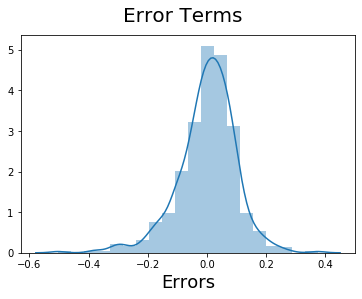

In [64]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [65]:
num_vars=['temp', 'hum', 'windspeed','cnt']
df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,Spring,Summer,Winter,...,Oct,Sep,Mon,Sat,Sun,Thurs,Tue,Wed,Mist,clear
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,1,0
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,1,0,0,0,1
299,0,0,0,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,1
152,0,0,0,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [66]:
y_test = df_test.pop('cnt')
X_test = df_test


In [67]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          219 non-null    int64  
 1   holiday     219 non-null    int64  
 2   workingday  219 non-null    int64  
 3   temp        219 non-null    float64
 4   hum         219 non-null    float64
 5   windspeed   219 non-null    float64
 6   Spring      219 non-null    uint8  
 7   Summer      219 non-null    uint8  
 8   Winter      219 non-null    uint8  
 9   Aug         219 non-null    uint8  
 10  Dec         219 non-null    uint8  
 11  Feb         219 non-null    uint8  
 12  Jan         219 non-null    uint8  
 13  Jul         219 non-null    uint8  
 14  Jun         219 non-null    uint8  
 15  Mar         219 non-null    uint8  
 16  May         219 non-null    uint8  
 17  Nov         219 non-null    uint8  
 18  Oct         219 non-null    uint8  
 19  Sep         219 non-null    

In [68]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
#X_test_new = X_test[X_train_new2.columns]

# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [69]:

# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(['workingday','Summer','Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sat', 'Sun', 'Thurs', 'Tue', 'Wed'], axis = 1)

In [70]:
lm = sm.OLS(y_test,X_test_m4).fit()   # Running the linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     98.85
Date:                Sun, 24 Jan 2021   Prob (F-statistic):           2.38e-73
Time:                        13:27:52   Log-Likelihood:                 214.49
No. Observations:                 219   AIC:                            -407.0
Df Residuals:                     208   BIC:                            -369.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3060      0.080      3.841      0.0

In [71]:
# Making predictions
y_pred = lm.predict(X_test_m4)

Text(0, 0.5, 'y_pred')

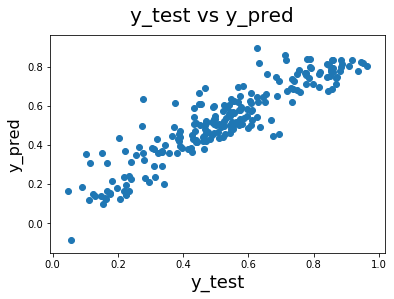

In [72]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [73]:
# R2 Score
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8261584459634276

In [74]:
# Mean Squared Error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
RMSE = round(sqrt(mean_squared_error(y_test, y_pred)),4)
RMSE

0.0909

In [75]:
# Mean Absolute Error
MAE = round(mean_absolute_error(y_test, y_pred),4)
MAE

0.0686